## Creating CNN Using Scratch And Transfer Learning

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [3]:
# re-size all image to this
IMAGE_SIZE=[224, 224]
train_path='Dataset/Dataset/Train'
valid_path='Dataset/Dataset/Test'

In [5]:
# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weight

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3],weights = 'imagenet',include_top=False) 


80134624/80134624 [==============================] - 37s 0us/step


In [6]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [7]:
# don't train existing weight
for layer in vgg19.layers:
    layer.trainable = False

In [8]:
# useful for getting number of output classes
folder = glob('Dataset/Dataset/Train/*')

In [9]:
folder

['Dataset/Dataset/Train\\Parasite', 'Dataset/Dataset/Train\\Uninfected']

In [10]:
# our Layer - you can add more if you want
x=Flatten()(vgg19.output)

In [14]:
prediction = Dense(len(folder), activation = 'softmax')(x)
# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [15]:
# view thw summary of model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [16]:
from tensorflow.keras.layers import MaxPooling2D

In [17]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding='same',activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=16,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=16,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 16)      1040      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 16)        1040      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 16)       0

In [18]:
# tell the model what cost and optimization mathod to use
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
# Use the Image Data Generator to import the images from dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./225,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./225)

In [21]:
# Make sure you provide the same target size as initialised for the image
training_set = train_datagen.flow_from_directory('Dataset/Dataset/Train', target_size=(224,224),batch_size=32,class_mode='categorical')

Found 416 images belonging to 2 classes.


In [22]:
training_set

In [25]:
test_set = test_datagen.flow_from_directory('Dataset/Dataset/Test',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 134 images belonging to 2 classes.


In [26]:
# fit the model
# Run the cell.It will take some time to execute
r = model.fit(training_set,validation_data=test_set,epochs=10,steps_per_epoch=len(training_set),validation_steps=len(test_set))

Epoch 1/10
13/13 [==============================] - 10s 668ms/step - loss: 2.4280 - accuracy: 0.4808 - val_loss: 0.6494 - val_accuracy: 0.6791
Epoch 2/10
13/13 [==============================] - 9s 655ms/step - loss: 0.7188 - accuracy: 0.5120 - val_loss: 0.6875 - val_accuracy: 0.5224
Epoch 3/10
13/13 [==============================] - 8s 639ms/step - loss: 0.6867 - accuracy: 0.5409 - val_loss: 0.6831 - val_accuracy: 0.5597
Epoch 4/10
13/13 [==============================] - 8s 630ms/step - loss: 0.6818 - accuracy: 0.5913 - val_loss: 0.6709 - val_accuracy: 0.5746
Epoch 5/10
13/13 [==============================] - 8s 634ms/step - loss: 0.6804 - accuracy: 0.5721 - val_loss: 0.6911 - val_accuracy: 0.5000
Epoch 6/10
13/13 [==============================] - 8s 622ms/step - loss: 0.6561 - accuracy: 0.6058 - val_loss: 0.6497 - val_accuracy: 0.6791
Epoch 7/10
13/13 [==============================] - 8s 642ms/step - loss: 0.6724 - accuracy: 0.5793 - val_loss: 0.7829 - val_accuracy: 0.3731
Epoch

100 images === total images
batch size=10 images
1 iteration = 1 forward propagation + 1 back propagation => 100/10 =10 iteration => 1 epoch

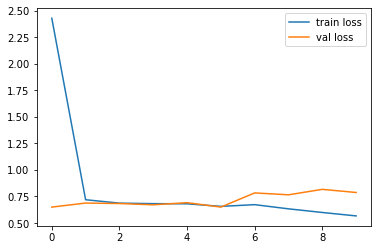

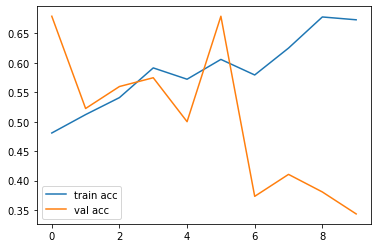

<Figure size 432x288 with 0 Axes>

In [27]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [28]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('model_vgg19.h5')

In [29]:
y_pred=model.predict(test_set)

5/5 [==============================] - 4s 90ms/step


In [30]:
y_pred

array([[0.6744458 , 0.3255542 ],
       [0.5532292 , 0.44677082],
       [0.41850045, 0.58149946],
       [0.6101402 , 0.38985974],
       [0.702485  , 0.29751503],
       [0.47447452, 0.52552557],
       [0.5156172 , 0.48438284],
       [0.74140424, 0.25859573],
       [0.4134265 , 0.5865734 ],
       [0.6016322 , 0.39836785],
       [0.6137256 , 0.38627437],
       [0.5099454 , 0.49005455],
       [0.61797476, 0.38202527],
       [0.32259002, 0.67740995],
       [0.43967742, 0.5603226 ],
       [0.54512554, 0.45487443],
       [0.40314803, 0.59685194],
       [0.61627823, 0.38372174],
       [0.6562717 , 0.3437283 ],
       [0.4081757 , 0.5918243 ],
       [0.3278825 , 0.6721175 ],
       [0.45183736, 0.5481627 ],
       [0.36794737, 0.6320526 ],
       [0.34229574, 0.6577043 ],
       [0.6549    , 0.34509993],
       [0.3945622 , 0.60543776],
       [0.5289156 , 0.47108442],
       [0.26620626, 0.73379374],
       [0.46820128, 0.5317987 ],
       [0.48623568, 0.5137643 ],
       [0.

In [31]:
import numpy as np
y_pred = np.argmax(y_pred,axis =1)

In [32]:
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0], dtype=int64)

In [33]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [34]:
model=load_model('model_vgg19.h5')

In [77]:
img=image.load_img('archive/cell_images/Uninfected/C165P126ThinF_IMG_20151117_171006_cell_141.png',target_size=(224,224))

In [94]:
img=image.load_img('archive/cell_images/Parasitized/C184P145ThinF_IMG_20151203_104153_cell_177.png',target_size=(224,224))

In [95]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [96]:
x.shape

(224, 224, 3)

In [97]:
x=x/255

In [98]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [99]:
model.predict(img_data)

1/1 [==============================] - 0s 24ms/step


array([[1., 0.]], dtype=float32)

In [100]:
a=np.argmax(model.predict(img_data),axis=1)

1/1 [==============================] - 0s 24ms/step


In [101]:
if(a==1):
    print("Infected")
else:
    print("Uninfected")

Uninfected
